In [2]:
#載入套件
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [42]:
#使用資料夾內鐵達尼號的資料集，練習邏輯迴歸的處理邏輯
train = pd.read_csv('data/titanic_data.csv')
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


<Axes: >

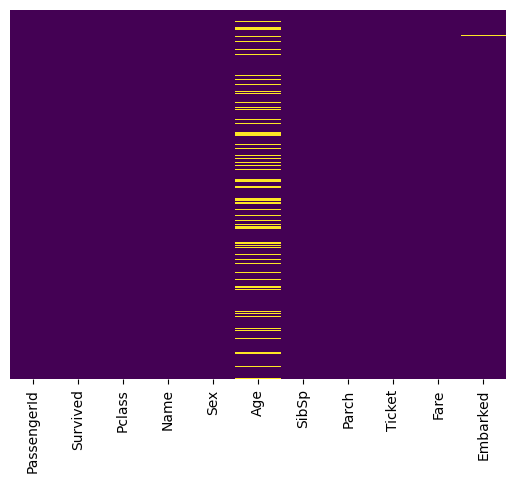

In [4]:
#探索資料
#用heatmap(.isnull()來找出缺失的資料在哪些欄位。Age似乎約有五分之一的資料缺失，可用合理資料補充。)
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

c:\Users\YU HSIAO ROU\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\YU HSIAO ROU\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\YU HSIAO ROU\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\YU HSIAO ROU\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: 

<Axes: xlabel='Survived', ylabel='count'>

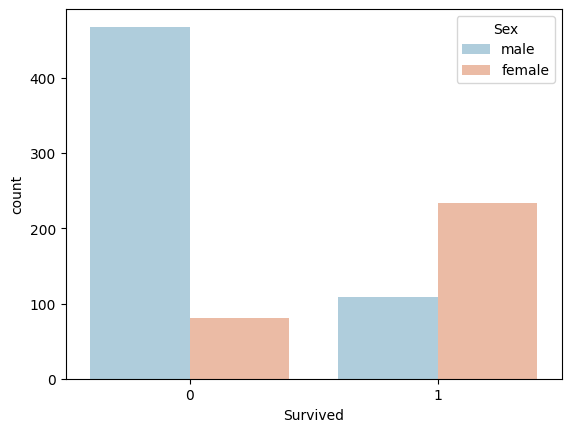

In [5]:
#用countplot來看性別是否影響最後存活。女性存活比例比男性高。
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

c:\Users\YU HSIAO ROU\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\YU HSIAO ROU\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\YU HSIAO ROU\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\YU HSIAO ROU\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: 

<Axes: xlabel='Survived', ylabel='count'>

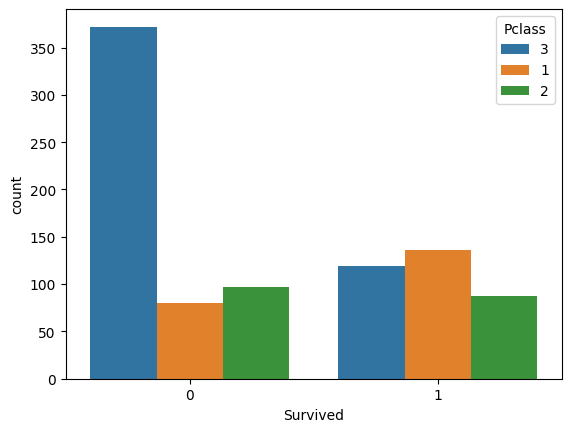

In [11]:
#艙等是否也影響存活?
train['Pclass'] = train['Pclass'].astype(str)
train['Survived'] = train['Survived'].astype(str)
sns.countplot(x='Survived', hue='Pclass', data=train)

C:\Users\YU HSIAO ROU\AppData\Local\Temp\ipykernel_20604\3771514646.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'].dropna(),kde=False,bins=30)


<Axes: xlabel='Age'>

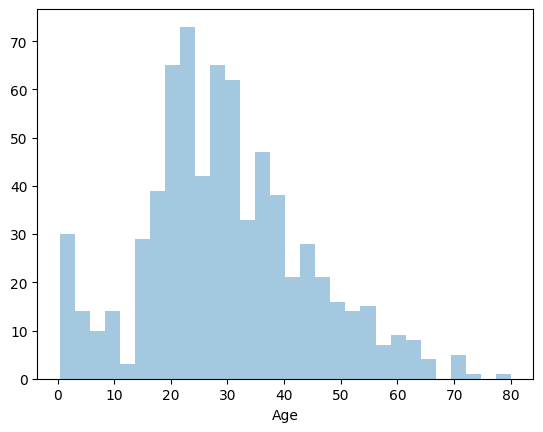

In [12]:
#用直方圖看年齡分佈。缺失資料在此不計。
sns.distplot(train['Age'].dropna(),kde=False,bins=30)

c:\Users\YU HSIAO ROU\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\YU HSIAO ROU\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\YU HSIAO ROU\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='SibSp', ylabel='count'>

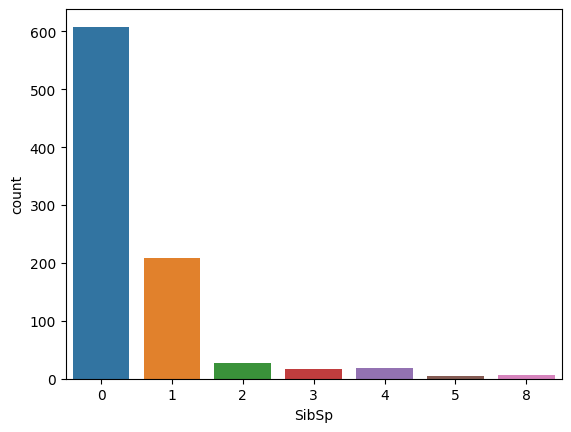

In [13]:
#SibSp代表兄弟姐妹或眷屬人數
sns.countplot(x='SibSp',data=train)

<Axes: >

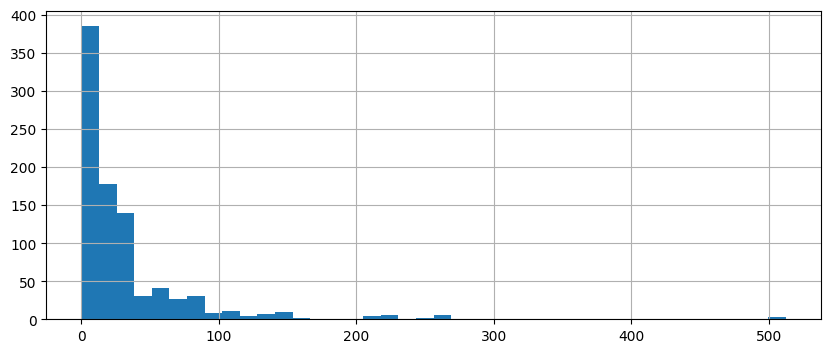

In [14]:
#用直方圖看票價分佈
train['Fare'].hist(bins=40,figsize=(10,4))

c:\Users\YU HSIAO ROU\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\YU HSIAO ROU\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\YU HSIAO ROU\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Pclass', ylabel='Age'>

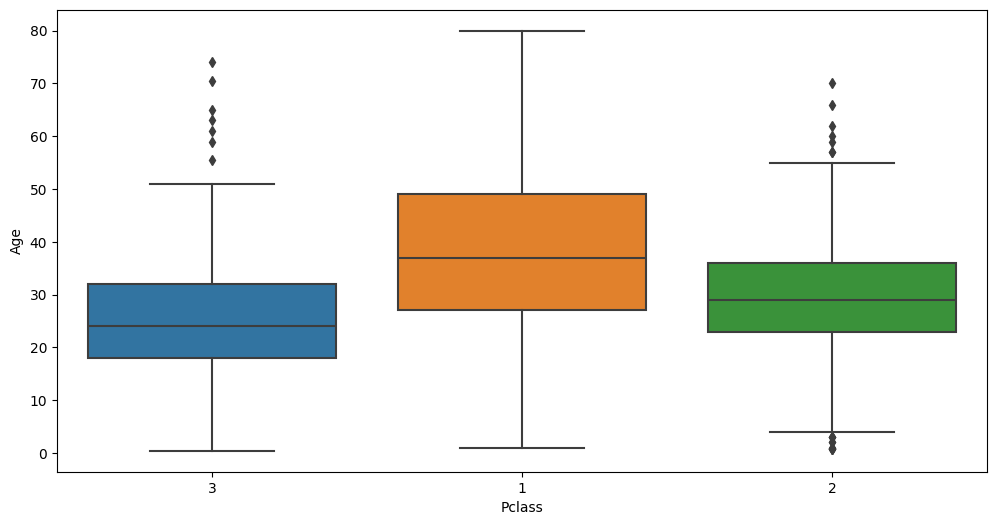

In [15]:
#資料清理
#剛有看到年齡資料約有五分之一缺失，一種做法是棄之不用，一種可以考慮把年齡平均放進去。
#使用盒鬚圖來看年齡和艙等的分佈。看起來頭等艙年齡較高，隨之降低。
plt.figure(figsize=(12,6))
sns.boxplot(x='Pclass',y='Age',data=train)

In [43]:
#把艙等平均年齡填入缺失的資料中
#艙等1平均年齡是37，艙等2平均年齡是29，艙等3平均年齡是24
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age): 
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

C:\Users\YU HSIAO ROU\AppData\Local\Temp\ipykernel_20604\3857805505.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
C:\Users\YU HSIAO ROU\AppData\Local\Temp\ipykernel_20604\3857805505.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


<Axes: >

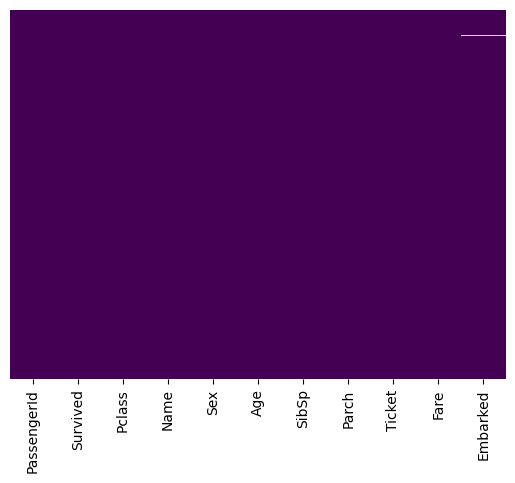

In [34]:
#用heatmap查看年齡是否還有缺失資料
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [20]:
train.dropna(inplace=True)#inplace： False: 返回新的數據集（默認） True: 在原數據集上操作

In [45]:
#虛擬變數範例
#使用pandas(d.get_dummies)將性別從類別資料轉為數值變數。
sex = pd.get_dummies(train['Sex'], drop_first=True).astype(int)
#請將drop_first=True，如果為True會刪除第一個類別值。
#本來若有k個level，drop_first=True會只剩下k-1個level，降低共線性的可能
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [33]:
train['Sex'].dtype

dtype('O')

In [44]:
#使用pandas將上船的港口從類別資料改換為數值變數(drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True).astype(int)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [46]:
#將性別及上船港口的數值變數和原始的data結合
train = pd.concat([train,sex,embark],axis=1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [47]:
#將原始的性別、登船港口、票號、姓名欄位棄用
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [48]:
#因為PassengerId在此也只是排序，因此也棄用
train.drop('PassengerId',axis=1,inplace=True)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [49]:
#建立feature資料集(選取survived以外所有欄位)與target資料集(survived)
X = train.drop('Survived',axis=1)
y = train['Survived']

In [50]:
#載入訓練組及測試組分組套件
from sklearn.model_selection import train_test_split

In [51]:
#設定隨機種子(random_state)為101，測試組比例佔30%
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [52]:
#載入邏輯回歸
from sklearn.linear_model import LogisticRegression

In [53]:
#建立訓練組邏輯迴歸模型
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

c:\Users\YU HSIAO ROU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [54]:
#使用模型進行測試集資料的預測
predictions = logmodel.predict(X_test)
predictions2 = logmodel.predict(X_train)

In [55]:
#ground truth
print(y_test.values)
print(y_train.values)

[0 1 0 1 0 0 1 0 1 1 0 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0
 0 0 1 1 1 1 0 0 1 0 0 0 0 1 0 1 1 1 1 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0
 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 1 0 1 1 0 0 1 0 1 0 1 0 1 1 1 1 1 1
 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1
 0 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 0
 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1
 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 1 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1
 0 0 1 1 0 1 1 0 1]
[1 1 1 1 1 1 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1
 0 0 1 1 0 0 1 1 1 0 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0
 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 1 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0
 0 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 1 1 0
 0 1 

#### 計算accuracy及結果顯示
accuracy<br>
error_index #錯誤答案是哪幾筆資料<br>
miss classification #錯誤答案<br>
錯誤欄位的正確之原始資料表格

In [56]:
error_index2=np.where(predictions2!=y_train.values)[0]
print('train accuracy:',1-len(error_index2)/len(X_train))
error_index=np.where(predictions!=y_test.values)[0]
print('test accuracy:',1-len(error_index)/len(X_test))

train accuracy: 0.8186195826645265
test accuracy: 0.7798507462686567


In [57]:
print('error_index:',error_index)
print('miss classification :',predictions[error_index])#錯誤答案
data_index=train.iloc[error_index].index#這裡變數train是所有資料
train.iloc[data_index]#錯誤欄位的正確之原始資料

error_index: [  2   3   6  13  14  33  39  45  55  56  63  67  70  71  74  82  86  89
  94  99 103 104 109 110 111 114 125 127 129 147 151 155 157 162 164 180
 181 184 192 195 197 198 200 201 205 206 208 210 220 221 230 231 232 235
 240 249 250 262 265]
miss classification : [1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0
 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 1 0 1 1 0 0 0]


,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
6,0,1,54.0,0,0,51.8625,1,0,1
13,0,3,39.0,1,5,31.2750,1,0,1
14,0,3,14.0,0,0,7.8542,0,0,1
33,0,2,66.0,0,0,10.5000,1,0,1
39,1,3,14.0,1,0,11.2417,0,0,0
45,0,3,24.0,0,0,8.0500,1,0,1
55,1,1,37.0,0,0,35.5000,1,0,1
56,1,2,21.0,0,0,10.5000,0,0,1
